In [3]:
%matplotlib inline

import pandas as pd
import akshare as ak
import quantstats as qs
import matplotlib.pyplot as plt

from finquant.portfolio import build_portfolio
from finquant import returns
from IPython.display import display

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# 读取股票基金量化指标计算结果
fund_matrix = pd.read_excel('data/fund_matrix.xlsx',
                            usecols='B:I',
                            dtype={'fund_code':str})
display(fund_matrix)

,fund_code,fund_abb,sharpe,sortino,max_drawdown,var,cvar,volatility
0,000082,嘉实研究阿尔法股票,0.671314,0.912618,-0.431181,-0.019135,-0.035152,0.189548
1,000309,大摩品质生活精选股票,0.680630,0.924815,-0.569028,-0.028378,-0.048255,0.281205
2,000326,南方中小盘成长股票,0.916061,1.302787,-0.227615,-0.013083,-0.021236,0.130858
3,000409,鹏华环保产业股票,0.868338,1.222053,-0.491221,-0.028100,-0.045264,0.280522
4,000411,景顺长城优质成长股票,0.460136,0.630492,-0.497608,-0.023474,-0.041226,0.230615
...,...,...,...,...,...,...,...,...
789,920003,中金新锐股票A,1.200071,1.740833,-0.296932,-0.019216,-0.025922,0.194384
790,920922,中金精选股票C,-0.243946,-0.321725,-0.337647,-0.019303,-0.026547,0.184570
791,920923,中金新锐股票C,1.208971,1.761144,-0.330795,-0.022207,-0.030583,0.224730
792,970041,国海量化优选一年持有股票A,-0.319185,-0.396108,-0.247322,-0.021488,-0.030855,0.204876


In [5]:
# 计算基金各个指标分位数矩阵
q = [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9,1]
fund_matrix_vol_quantile = fund_matrix.quantile(q=q,interpolation='linear')
display(fund_matrix_vol_quantile)

,sharpe,sortino,max_drawdown,var,cvar,volatility
0.0,-224488.217356,-15.874508,-0.854600,-0.047220,-0.068851,1.122609e-07
0.1,-1.497810,-1.960469,-0.510384,-0.033248,-0.048847,1.926803e-01
0.2,-0.967948,-1.290744,-0.463056,-0.030776,-0.044303,2.140052e-01
0.3,-0.418727,-0.581078,-0.431793,-0.029048,-0.042061,2.282952e-01
0.4,0.082826,0.109432,-0.408521,-0.027748,-0.039883,2.400543e-01
0.5,0.315224,0.439859,-0.378988,-0.026317,-0.037618,2.563595e-01
0.6,0.453654,0.628753,-0.349293,-0.024810,-0.035726,2.659592e-01
0.7,0.574056,0.803476,-0.319324,-0.023502,-0.033994,2.801638e-01
0.8,0.693598,0.986924,-0.278388,-0.021887,-0.031939,2.952067e-01
0.9,0.896331,1.292821,-0.234140,-0.019670,-0.029032,3.195654e-01


In [6]:
display(type(fund_matrix_vol_quantile))
# 分位数矩阵的数据结构为DataFrame

pandas.core.frame.DataFrame

In [7]:
# 使用fvq标识波动率的分位数列表
fvq = fund_matrix_vol_quantile.volatility
display(fvq)

0.0    1.122609e-07
0.1    1.926803e-01
0.2    2.140052e-01
0.3    2.282952e-01
0.4    2.400543e-01
0.5    2.563595e-01
0.6    2.659592e-01
0.7    2.801638e-01
0.8    2.952067e-01
0.9    3.195654e-01
1.0    4.464938e-01
Name: volatility, dtype: float64

根据波动率分组，第一组为波动率为10%分位数以内的基金，第二组为波动率为10%分位数到20%分位数的基金，第三组、第四组、第五组以此类推，仅提取50%分位数以内的基金

**第一组**

In [8]:
# 第一组基金fmv1
fmv1 = fund_matrix[fund_matrix.volatility <= fvq[0.1]]
fmv1.sort_values(by="sharpe",ascending=False)

,fund_code,fund_abb,sharpe,sortino,max_drawdown,var,cvar,volatility
683,014140,易方达高质量增长量化精选股票C,51.990496,inf,0.000000,0.001392,0.001392,1.355364e-02
682,014139,易方达高质量增长量化精选股票A,48.862524,inf,0.000000,0.001325,0.001325,1.467859e-02
749,015773,招商移动互联网产业股票基金C,16.668426,inf,0.000000,-0.006101,-0.006101,1.628057e-01
119,001678,英大国企改革主题股票,1.206185,1.779887,-0.186090,-0.018632,-0.029280,1.885287e-01
363,008128,湘财长源股票型A,1.126501,1.651569,-0.154822,-0.017642,-0.024301,1.779405e-01
...,...,...,...,...,...,...,...,...
686,014186,招商专精特新股票C,-1.829717,-2.441934,-0.140200,-0.015156,-0.022550,1.366889e-01
660,013491,同泰金融精选股票C,-1.858246,-2.257365,-0.156482,-0.021061,-0.031064,1.897601e-01
669,013899,上投摩根全景优势股票A,-2.315603,-2.848283,-0.137100,-0.017294,-0.021502,1.533106e-01
670,013900,上投摩根全景优势股票C,-2.387554,-2.928237,-0.138300,-0.017329,-0.021524,1.532340e-01


易方达高质量增长量化、招商移动互联网、中欧核心消费成立不足1年，不做参考。除此之外，进一步筛选出sharpe高于1的基金。

In [84]:
fmv1_sharpe = fmv1[(fmv1.max_drawdown < 0)]
fmv1_sharpe=fmv1_sharpe.sort_values(by='sharpe', ascending=False).head(15)
fmv1_sharpe.set_index('fund_code',inplace=True)
fmv1_code = fmv1_sharpe.index
display(fmv1_sharpe)

,fund_abb,sharpe,sortino,max_drawdown,var,cvar,volatility
fund_code,,,,,,,
001678,英大国企改革主题股票,1.206185,1.779887,-0.186090,-0.018632,-0.029280,0.188529
008128,湘财长源股票型A,1.126501,1.651569,-0.154822,-0.017642,-0.024301,0.177941
015085,中欧核心消费股票发起A,1.116141,1.505387,-0.020598,-0.015476,-0.020598,0.156032
008129,湘财长源股票型C,1.093363,1.600435,-0.155543,-0.017654,-0.024319,0.177828
001718,工银物流产业股票A,1.088749,1.581550,-0.324028,-0.018948,-0.030442,0.190821
003298,嘉实物流产业股票A,1.085220,1.577697,-0.246200,-0.017693,-0.027785,0.178165
003299,嘉实物流产业股票C,1.065546,1.547937,-0.246200,-0.017721,-0.028201,0.178301
320020,诺安策略精选股票,1.024925,1.423832,-0.202271,-0.010901,-0.019164,0.109502
001736,圆信永丰优加生活,1.022877,1.473448,-0.284009,-0.018931,-0.028455,0.190150


**第二组**

In [85]:
# 第二组基金fmv2
fmv2 = fund_matrix[(fund_matrix.volatility <= fvq[0.2]) & (fund_matrix.volatility > fvq[0.1])]
fmv2.sort_values(by="sharpe",ascending=False)

,fund_code,fund_abb,sharpe,sortino,max_drawdown,var,cvar,volatility
748,015593,国泰金鑫股票C,15.798926,inf,0.000000,-0.008756,-0.008756,0.213972
789,920003,中金新锐股票A,1.200071,1.740833,-0.296932,-0.019216,-0.025922,0.194384
199,004350,汇丰晋信价值先锋股票A,1.185205,1.723887,-0.263651,-0.019761,-0.031318,0.199785
105,001579,国泰大农业股票A,1.016749,1.485969,-0.233251,-0.019659,-0.028587,0.197413
125,001714,工银文体产业股票A,1.007528,1.458796,-0.292922,-0.019940,-0.029647,0.200160
...,...,...,...,...,...,...,...,...
477,010204,中银港股通优势成长股票,-1.759222,-2.236562,-0.398487,-0.022305,-0.031513,0.201676
560,011285,民生价值优选6个月持有股票A,-1.828273,-2.416843,-0.332637,-0.023218,-0.029252,0.209416
637,012835,招商景气精选股票A,-1.848624,-2.346615,-0.253544,-0.021470,-0.027105,0.193507
561,011286,民生价值优选6个月持有股票C,-1.851919,-2.444316,-0.334893,-0.023261,-0.029337,0.209624


国泰金鑫成立不足1年，不做参考。除此之外，进一步筛选出sharpe高于1的基金。

In [86]:
fmv2_sharpe = fmv2[(fmv2.max_drawdown < 0)]
fmv2_sharpe=fmv2_sharpe.sort_values(by='sharpe', ascending=False).head(15)
fmv2_sharpe.set_index('fund_code',inplace=True)
fmv2_code = fmv2_sharpe.index
display(fmv2_sharpe)

,fund_abb,sharpe,sortino,max_drawdown,var,cvar,volatility
fund_code,,,,,,,
920003,中金新锐股票A,1.200071,1.740833,-0.296932,-0.019216,-0.025922,0.194384
004350,汇丰晋信价值先锋股票A,1.185205,1.723887,-0.263651,-0.019761,-0.031318,0.199785
001579,国泰大农业股票A,1.016749,1.485969,-0.233251,-0.019659,-0.028587,0.197413
001714,工银文体产业股票A,1.007528,1.458796,-0.292922,-0.019940,-0.029647,0.200160
006138,国联安价值优选股票,0.962987,1.391061,-0.193607,-0.019691,-0.031041,0.197313
001725,汇添富高端制造股票A,0.952424,1.390748,-0.307484,-0.020905,-0.029944,0.209397
519714,交银消费新驱动股票,0.907966,1.256309,-0.365712,-0.019854,-0.033015,0.198515
007470,博道叁佰智航股票A,0.891668,1.247189,-0.281745,-0.020142,-0.030124,0.201262
001473,建信大安全战略精选股票,0.882365,1.229594,-0.328640,-0.020635,-0.033969,0.206118


**第三组**

In [87]:
# 第三组基金fmv3
fmv3 = fund_matrix[(fund_matrix.volatility <= fvq[0.3]) & (fund_matrix.volatility > fvq[0.2])]
fmv3.sort_values(by="sharpe",ascending=False)

,fund_code,fund_abb,sharpe,sortino,max_drawdown,var,cvar,volatility
552,011229,创金合信数字经济主题股票A,1.404878,2.026740,-0.266568,-0.021705,-0.033509,0.221392
553,011230,创金合信数字经济主题股票C,1.381110,1.990151,-0.267707,-0.021717,-0.033521,0.221297
353,007950,招商量化精选股票C,1.248979,1.698922,-0.253450,-0.021585,-0.034937,0.218784
791,920923,中金新锐股票C,1.208971,1.761144,-0.330795,-0.022207,-0.030583,0.224730
115,001645,国泰大健康股票A,0.995106,1.466300,-0.371145,-0.022271,-0.032201,0.223456
...,...,...,...,...,...,...,...,...
483,010331,天弘消费股票A,-1.492866,-1.930528,-0.337535,-0.024268,-0.033650,0.221545
484,010332,天弘消费股票C,-1.515067,-1.957058,-0.339608,-0.024283,-0.033665,0.221507
611,011883,招商蓝筹精选股票C,-1.539504,-2.061495,-0.313859,-0.024986,-0.030536,0.227719
623,012214,民生加银核心资产股票A,-1.890688,-2.538428,-0.222976,-0.024792,-0.028758,0.223109


进一步筛选出sharpe高于1的基金。

In [88]:
fmv3_sharpe = fmv3[(fmv3.max_drawdown < 0)]
fmv3_sharpe=fmv3_sharpe.sort_values(by='sharpe', ascending=False).head(15)
fmv3_sharpe.set_index('fund_code', inplace=True)
fmv3_code = fmv3_sharpe.index
display(fmv3_sharpe)

,fund_abb,sharpe,sortino,max_drawdown,var,cvar,volatility
fund_code,,,,,,,
011229,创金合信数字经济主题股票A,1.404878,2.026740,-0.266568,-0.021705,-0.033509,0.221392
011230,创金合信数字经济主题股票C,1.381110,1.990151,-0.267707,-0.021717,-0.033521,0.221297
007950,招商量化精选股票C,1.248979,1.698922,-0.253450,-0.021585,-0.034937,0.218784
920923,中金新锐股票C,1.208971,1.761144,-0.330795,-0.022207,-0.030583,0.224730
001645,国泰大健康股票A,0.995106,1.466300,-0.371145,-0.022271,-0.032201,0.223456
001975,景顺长城环保优势股票,0.992300,1.461833,-0.402341,-0.021509,-0.030605,0.215788
006478,长盛多因子策略优选,0.934607,1.327583,-0.251763,-0.022274,-0.031308,0.222944
006346,安信量化优选股票A,0.919535,1.279774,-0.355423,-0.021458,-0.031710,0.214646
006347,安信量化优选股票C,0.900914,1.252823,-0.357092,-0.021479,-0.031734,0.214703


**组合分析**
根据波动率选出三组基金，如果安装等权配置，三组基金的回报情况如何？

In [89]:
# 获取数据函数
def GetFundInfoByAkshare(fund, indicator):
    fund_open_fund_info_em_df = ak.fund_open_fund_info_em(fund=fund, indicator=indicator)
    return fund_open_fund_info_em_df

# 格式化数据
def FormatData(fund_open_fund_info_em_df):
    data = fund_open_fund_info_em_df
    data.rename(columns={'净值日期':'date', '累计净值':'c'+code}, inplace=True)
    data.date = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)

    return data

In [91]:
str_date = pd.to_datetime('2020-1-1')
end_date = pd.to_datetime('2022-4-30')

**第一组基金构建组合**

In [92]:
fp1_data = pd.DataFrame()

for code in fmv1_code:
    df = GetFundInfoByAkshare(fund=code,indicator='累计净值走势')
    f_df = FormatData(df)
    fp1_data = pd.concat([fp1_data,f_df], axis=1)

fp1_data = fp1_data[str_date:end_date]
display(fp1_data)

,c001678,c008128,c015085,c008129,c001718,c003298,c003299,c320020,c001736,c015086,c001938,c000326,c010349,c001651,c001705
date,,,,,,,,,,,,,,,
2020-01-02,1.2742,NaN,NaN,NaN,1.752,1.501,1.493,2.0708,1.666,NaN,2.2023,1.3254,NaN,1.612,1.4240
2020-01-03,1.2833,0.9999,NaN,0.9997,1.749,1.486,1.478,2.0889,1.674,NaN,2.2013,1.3311,NaN,1.598,1.4220
2020-01-06,1.2812,NaN,NaN,NaN,1.755,1.485,1.478,1.9100,1.681,NaN,2.2023,1.3323,NaN,1.584,1.4240
2020-01-07,1.2896,NaN,NaN,NaN,1.767,1.498,1.490,1.9160,1.699,NaN,2.2177,1.3468,NaN,1.598,1.4350
2020-01-08,1.2736,NaN,NaN,NaN,1.759,1.494,1.486,1.9017,1.681,NaN,2.1983,1.3336,NaN,1.588,1.4250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,1.8649,1.5042,NaN,1.4843,2.880,2.302,2.264,2.5173,2.630,NaN,2.5424,1.7587,1.883,2.356,2.1622
2022-04-26,1.8126,1.4783,NaN,1.4588,2.833,2.277,2.240,2.4874,2.579,NaN,2.5232,1.7442,1.860,2.343,2.1599
2022-04-27,1.8640,1.4961,NaN,1.4764,2.937,2.326,2.288,2.5556,2.686,NaN,2.5857,1.8107,1.909,2.383,2.2134


In [94]:
# 提取夏普比前五的数据，剔除存在缺失值的基金
fp1_data = fp1_data.loc[:,['c001678','c001718','c003298','c320020','c001736']].dropna()
pf1 = build_portfolio(data=fp1_data)
pf1.properties()

----------------------------------------------------------------------
Stocks: c001678, c001718, c003298, c320020, c001736
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.219
Portfolio Volatility: 0.180
Portfolio Sharpe Ratio: 1.188

Skewness:
   c001678   c001718   c003298  c320020   c001736
0 -0.52332 -0.242267 -0.385128 -0.30753 -0.706495

Kurtosis:
    c001678   c001718   c003298   c320020   c001736
0 -0.888337 -1.306438 -0.951506 -0.927634 -0.902194

Information:
   Allocation     Name
0         0.2  c001678
1         0.2  c001718
2         0.2  c003298
3         0.2  c320020
4         0.2  c001736
----------------------------------------------------------------------


**第二组基金构建组合**

In [95]:
fp2_data = pd.DataFrame()

for code in fmv2_code:
    df = GetFundInfoByAkshare(fund=code,indicator='累计净值走势')
    f_df = FormatData(df)
    fp2_data = pd.concat([fp2_data,f_df], axis=1)

fp2_data = fp2_data[str_date:end_date]
display(fp2_data)

,c920003,c004350,c001579,c001714,c006138,c001725,c519714,c007470,c001473,c007471,c001520,c006195,c005188,c005189,c004241
date,,,,,,,,,,,,,,,
2020-01-02,NaN,1.4207,1.681,2.079,1.3891,1.475,2.824,1.1887,1.7999,1.1860,1.083,1.1911,1.1763,1.1627,1.9578
2020-01-03,NaN,1.4210,1.675,2.089,1.3830,1.464,2.826,1.1833,1.7890,1.1805,1.082,1.1937,1.1754,1.1618,1.9567
2020-01-06,NaN,1.4259,1.689,2.103,1.3780,1.458,2.803,1.1797,1.7810,1.1769,1.079,1.1959,1.1758,1.1623,1.9576
2020-01-07,NaN,1.4340,1.724,2.118,1.3916,1.472,2.826,1.1926,1.7973,1.1898,1.088,1.2085,1.1868,1.1732,1.9729
2020-01-08,NaN,1.4243,1.706,2.102,1.3777,1.449,2.826,1.1807,1.7853,1.1779,1.074,1.1943,1.1740,1.1605,1.9537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,3.5107,1.9543,2.197,2.824,1.6831,2.090,4.091,1.4066,2.8436,1.3905,1.852,1.3764,1.5878,1.5837,2.2707
2022-04-26,3.4096,1.9176,2.163,2.817,1.6741,2.045,4.150,1.3909,2.8329,1.3750,1.845,1.3280,1.5737,1.5697,2.2520
2022-04-27,3.5294,1.9577,2.252,2.905,1.7067,2.141,4.238,1.4434,2.8792,1.4269,1.875,1.3721,1.6456,1.6413,2.3126


In [97]:
fp2_data = fp2_data.loc[:,['c004350','c001579','c001714','c006138','c001725']].dropna()
pf2 = build_portfolio(data=fp2_data)
pf2.properties()

----------------------------------------------------------------------
Stocks: c004350, c001579, c001714, c006138, c001725
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.175
Portfolio Volatility: 0.196
Portfolio Sharpe Ratio: 0.869

Skewness:
    c004350   c001579   c001714   c006138   c001725
0 -0.197304 -1.097086 -0.724943 -1.228125 -0.576196

Kurtosis:
    c004350   c001579   c001714   c006138   c001725
0 -0.882167  0.387596 -0.753667  0.074689 -0.658022

Information:
   Allocation     Name
0         0.2  c004350
1         0.2  c001579
2         0.2  c001714
3         0.2  c006138
4         0.2  c001725
----------------------------------------------------------------------


**第三组基金构建组合**

In [98]:
fp3_data = pd.DataFrame()

for code in fmv3_code:
    df = GetFundInfoByAkshare(fund=code,indicator='累计净值走势')
    f_df = FormatData(df)
    fp3_data = pd.concat([fp3_data,f_df], axis=1)

fp3_data = fp3_data[str_date:end_date]
display(fp3_data)

,c011229,c011230,c007950,c920923,c001645,c001975,c006478,c006346,c006347,c001677,c519193,c002556,c005267,c003190,c007831
date,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,1.1098,NaN,2.193,2.003,1.1682,1.4180,1.4128,1.596,1.7959,1.145,1.2332,1.5695,1.0536
2020-01-03,NaN,NaN,1.1096,NaN,2.200,2.005,1.1556,1.4250,1.4197,1.590,1.8023,1.142,1.2317,1.5505,1.0560
2020-01-06,NaN,NaN,1.1123,NaN,2.209,2.028,1.1396,1.4329,1.4276,1.576,1.8191,1.137,1.2181,1.5426,1.0579
2020-01-07,NaN,NaN,1.1271,NaN,2.232,2.033,1.1488,1.4555,1.4500,1.600,1.8187,1.145,1.2349,1.5684,1.0712
2020-01-08,NaN,NaN,1.1119,NaN,2.249,2.021,1.1401,1.4376,1.4323,1.594,1.7895,1.134,1.2274,1.5594,1.0552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,1.2439,1.2362,1.6694,3.0002,2.904,2.653,1.8060,1.5892,1.5685,2.349,2.1243,1.672,1.7647,2.1193,1.2641
2022-04-26,1.2329,1.2252,1.6227,2.9000,2.828,2.604,1.7927,1.5582,1.5379,2.318,2.1069,1.641,1.7408,2.1537,1.2336
2022-04-27,1.2904,1.2823,1.6897,3.0186,2.955,2.744,1.8186,1.6170,1.5959,2.440,2.1542,1.707,1.7805,2.2005,1.2847


In [99]:
fp3_data = fp3_data.loc[:,['c007950','c001645','c001975','c006478','c006346']].dropna()
pf3 = build_portfolio(data=fp3_data)
pf3.properties()

----------------------------------------------------------------------
Stocks: c007950, c001645, c001975, c006478, c006346
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.186
Portfolio Volatility: 0.212
Portfolio Sharpe Ratio: 0.855

Skewness:
    c007950  c001645   c001975   c006478   c006346
0 -0.455026 -1.15566  0.005073 -0.444622 -0.703374

Kurtosis:
   c007950   c001645   c001975   c006478   c006346
0 -0.79129  0.211354 -1.074294 -0.992916 -0.564335

Information:
   Allocation     Name
0         0.2  c007950
1         0.2  c001645
2         0.2  c001975
3         0.2  c006478
4         0.2  c006346
----------------------------------------------------------------------


## 各波动率组的组合业绩表现

**组合一：低波动组**

In [100]:
fp1_ret = pf1.comp_daily_returns()
fp1_ret['ret'] =fp1_ret.apply(lambda x: x.sum()/5, axis=1)
display(fp1_ret)

,c001678,c001718,c003298,c320020,c001736,ret
Date,,,,,,
2020-01-03,0.007142,-0.001712,-0.009993,0.008741,0.004802,0.001796
2020-01-06,-0.001636,0.003431,-0.000673,-0.085643,0.004182,-0.016068
2020-01-07,0.006556,0.006838,0.008754,0.003141,0.010708,0.007199
2020-01-08,-0.012407,-0.004527,-0.002670,-0.007463,-0.010594,-0.007533
2020-01-09,0.008715,0.017624,0.019411,0.008045,0.014872,0.013734
...,...,...,...,...,...,...
2022-04-25,-0.034731,-0.049191,-0.047580,-0.045573,-0.055655,-0.046546
2022-04-26,-0.028044,-0.016319,-0.010860,-0.011878,-0.019392,-0.017299
2022-04-27,0.028357,0.036710,0.021520,0.027418,0.041489,0.031099


                           Strategy
-------------------------  ----------
Start Period               2020-01-03
End Period                 2022-04-29
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          57.12%
CAGR﹪                     21.5%

Sharpe                     1.22
Prob. Sharpe Ratio         96.86%
Smart Sharpe               1.21
Sortino                    1.69
Smart Sortino              1.68
Sortino/√2                 1.2
Smart Sortino/√2           1.19
Omega                      1.24

Max Drawdown               -19.51%
Longest DD Days            128
Volatility (ann.)          18.01%
Calmar                     1.1
Skew                       -0.78
Kurtosis                   4.48

Expected Daily %           0.08%
Expected Monthly %         1.63%
Expected Yearly %          16.25%
Kelly Criterion            11.07%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.78%
Expected Shortfall (cVaR)  -1.78%

Max Consecutive Wins      

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-05,2022-04-26,2022-04-29,114,-19.514168,-18.097360
2,2020-02-24,2020-03-23,2020-07-01,128,-15.656428,-13.542045
3,2020-01-21,2020-02-03,2020-02-12,22,-9.724846,-6.126932
4,2021-07-23,2021-07-28,2021-08-23,31,-5.669433,-4.555473
5,2020-07-14,2020-07-16,2020-07-22,8,-5.280610,-4.336369


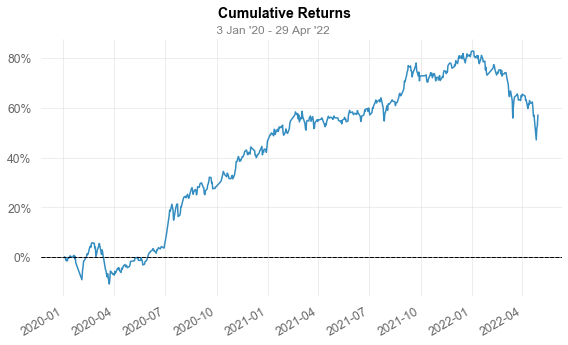

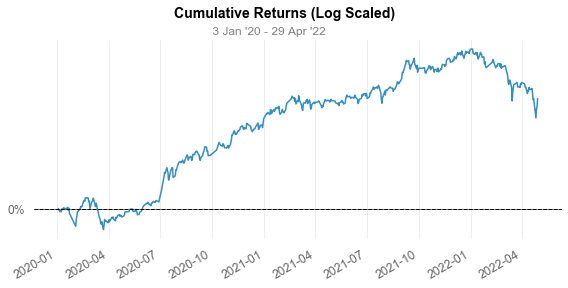

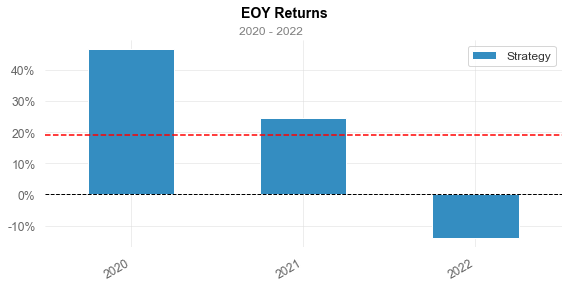

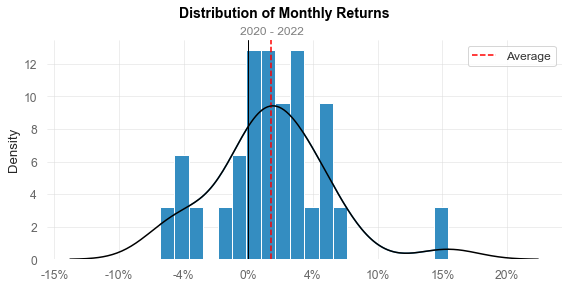

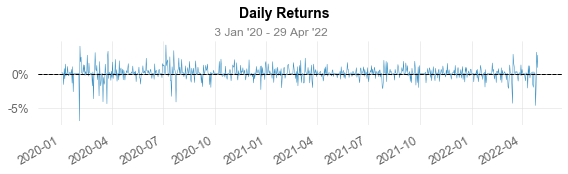

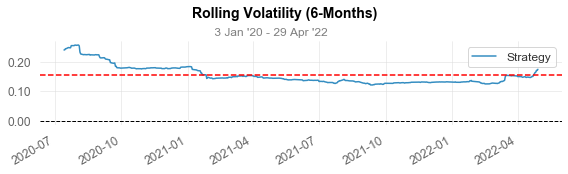

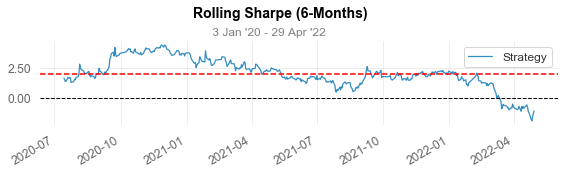

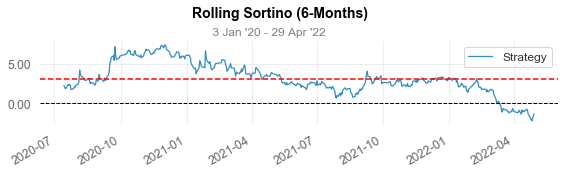

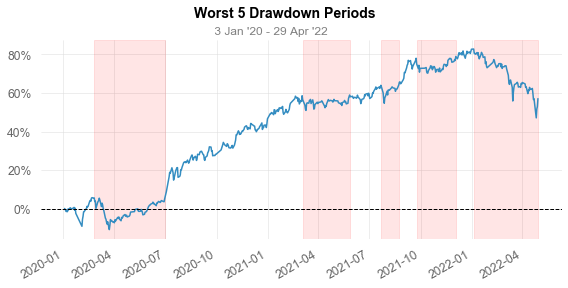

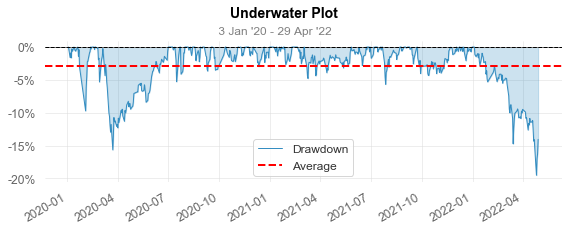

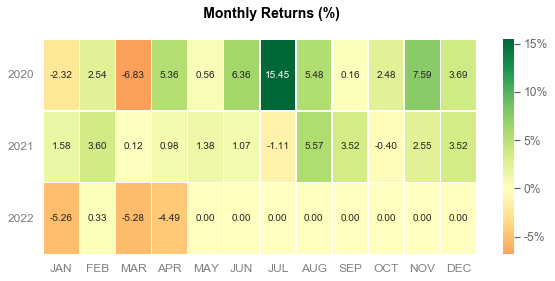

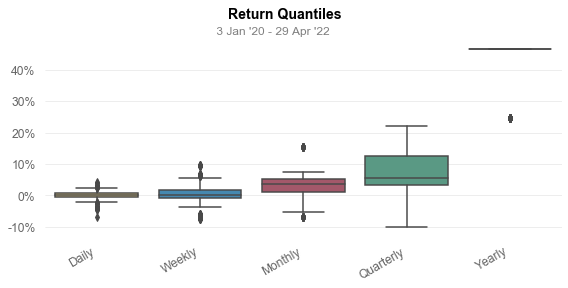

In [101]:
fp1_returns = pd.Series(fp1_ret.ret)
qs.reports.full(fp1_returns)

**组合二：中波动组**

In [102]:
fp2_ret = pf2.comp_daily_returns()
fp2_ret['ret'] =fp2_ret.apply(lambda x: x.sum()/5, axis=1)
display(fp2_ret)

,c004350,c001579,c001714,c006138,c001725,ret
Date,,,,,,
2020-01-03,0.000211,-0.003569,0.004810,-0.004391,-0.007458,-0.002079
2020-01-06,0.003448,0.008358,0.006702,-0.003615,-0.004098,0.002159
2020-01-07,0.005681,0.020722,0.007133,0.009869,0.009602,0.010601
2020-01-08,-0.006764,-0.010441,-0.007554,-0.009989,-0.015625,-0.010075
2020-01-09,0.011093,0.009379,0.014272,0.013719,0.016563,0.013005
...,...,...,...,...,...,...
2022-04-25,-0.054981,-0.042284,-0.040435,-0.050330,-0.051294,-0.047865
2022-04-26,-0.018779,-0.015476,-0.002479,-0.005347,-0.021531,-0.012722
2022-04-27,0.020912,0.041147,0.031239,0.019473,0.046944,0.031943


                           Strategy
-------------------------  ----------
Start Period               2020-01-03
End Period                 2022-04-29
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          41.51%
CAGR﹪                     16.14%

Sharpe                     0.89
Prob. Sharpe Ratio         91.27%
Smart Sharpe               0.88
Sortino                    1.24
Smart Sortino              1.22
Sortino/√2                 0.87
Smart Sortino/√2           0.86
Omega                      1.16

Max Drawdown               -22.19%
Longest DD Days            263
Volatility (ann.)          19.57%
Calmar                     0.73
Skew                       -0.68
Kurtosis                   2.51

Expected Daily %           0.06%
Expected Monthly %         1.25%
Expected Yearly %          12.27%
Kelly Criterion            7.44%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.96%
Expected Shortfall (cVaR)  -1.96%

Max Consecutive Wins    

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-05,2022-04-26,2022-04-29,114,-22.192500,-21.189848
2,2020-03-06,2020-03-23,2020-05-08,63,-13.146954,-12.074522
3,2021-02-22,2021-03-09,2021-11-12,263,-11.373133,-10.946608
4,2020-01-14,2020-02-03,2020-02-17,34,-10.761831,-8.127053
5,2020-09-02,2020-09-10,2020-12-21,110,-7.532983,-7.392909


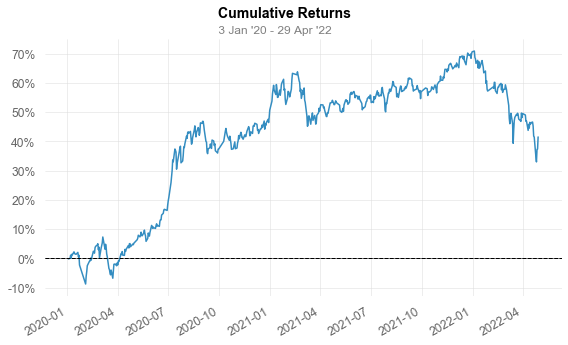

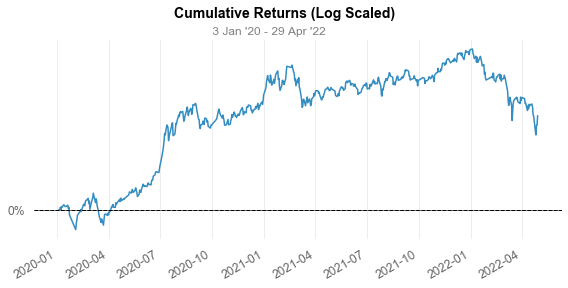

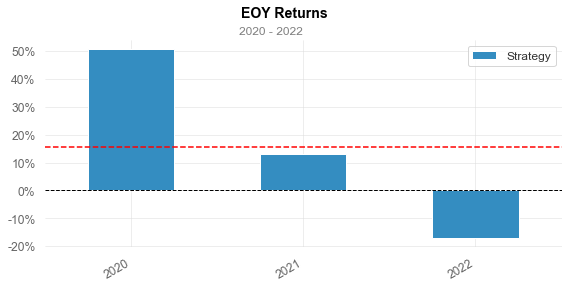

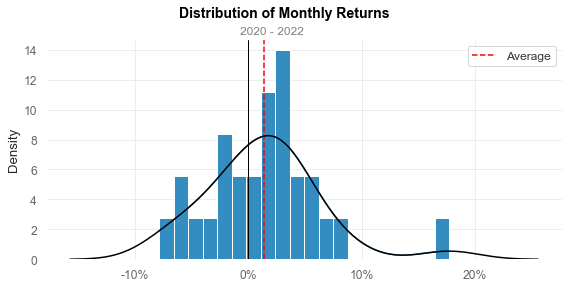

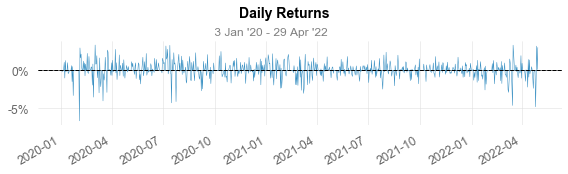

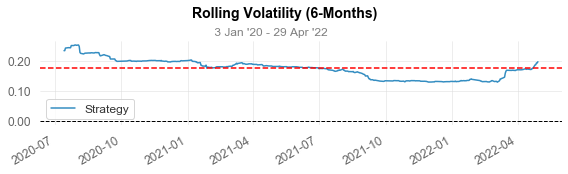

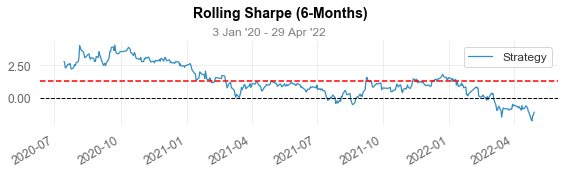

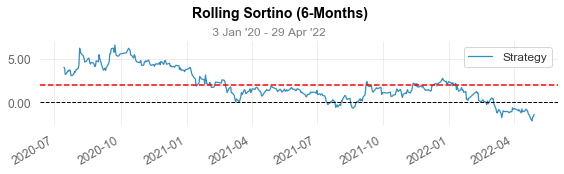

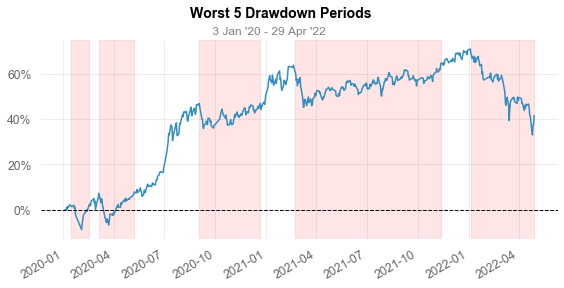

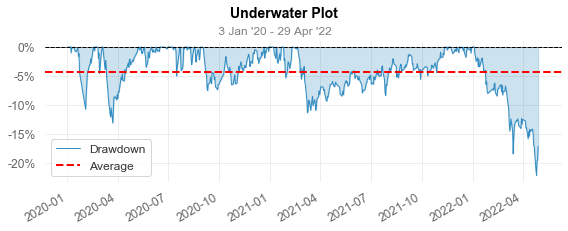

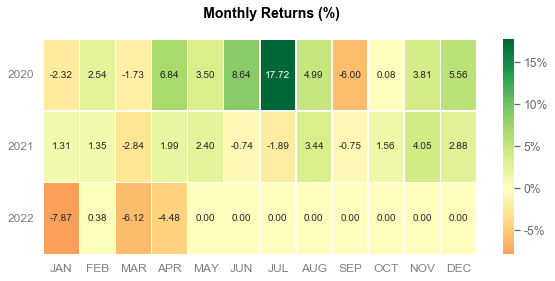

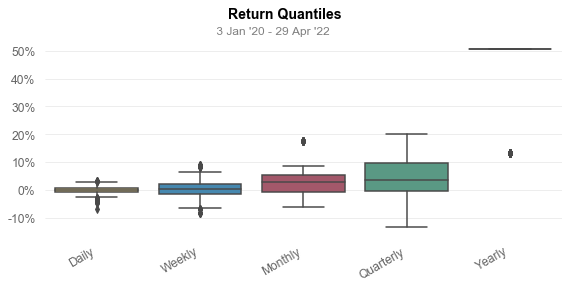

In [103]:
fp2_returns = pd.Series(fp2_ret.ret)
qs.reports.full(fp2_returns)

**组合三：高波动组**

In [104]:
fp3_ret = pf3.comp_daily_returns()
fp3_ret['ret'] =fp3_ret.apply(lambda x: x.sum()/5, axis=1)
display(fp3_ret)

,c007950,c001645,c001975,c006478,c006346,ret
Date,,,,,,
2020-01-03,-0.000180,0.003192,0.000999,-0.010786,0.004937,-0.000368
2020-01-06,0.002433,0.004091,0.011471,-0.013846,0.005544,0.001939
2020-01-07,0.013306,0.010412,0.002465,0.008073,0.015772,0.010006
2020-01-08,-0.013486,0.007616,-0.005903,-0.007573,-0.012298,-0.006329
2020-01-09,0.015289,0.019564,0.016329,0.013946,0.013982,0.015822
...,...,...,...,...,...,...
2022-04-25,-0.069817,-0.050980,-0.065516,-0.027568,-0.061311,-0.055039
2022-04-26,-0.027974,-0.026171,-0.018470,-0.007364,-0.019507,-0.019897
2022-04-27,0.041289,0.044908,0.053763,0.014447,0.037736,0.038429


                           Strategy
-------------------------  ----------
Start Period               2020-01-03
End Period                 2022-04-29
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          43.97%
CAGR﹪                     17.01%

Sharpe                     0.88
Prob. Sharpe Ratio         90.87%
Smart Sharpe               0.86
Sortino                    1.22
Smart Sortino              1.18
Sortino/√2                 0.86
Smart Sortino/√2           0.84
Omega                      1.16

Max Drawdown               -28.28%
Longest DD Days            136
Volatility (ann.)          21.17%
Calmar                     0.6
Skew                       -0.66
Kurtosis                   2.4

Expected Daily %           0.06%
Expected Monthly %         1.31%
Expected Yearly %          12.92%
Kelly Criterion            7.6%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.12%
Expected Shortfall (cVaR)  -2.12%

Max Consecutive Wins       

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-12-14,2022-04-26,2022-04-29,136,-28.276183,-26.820115
2,2020-02-26,2020-03-23,2020-06-01,96,-14.100964,-12.550605
3,2021-02-18,2021-03-10,2021-05-31,102,-10.169076,-9.946628
4,2020-01-23,2020-02-03,2020-02-12,20,-9.342415,-7.062752
5,2020-09-03,2020-09-10,2020-10-13,40,-7.312249,-6.848665


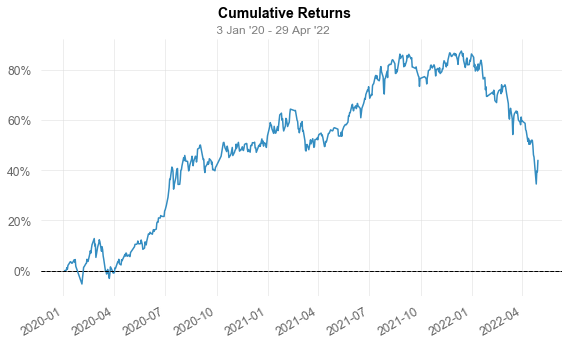

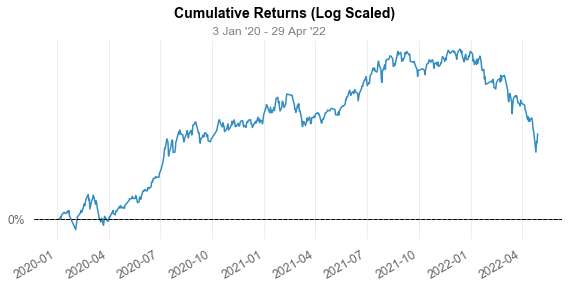

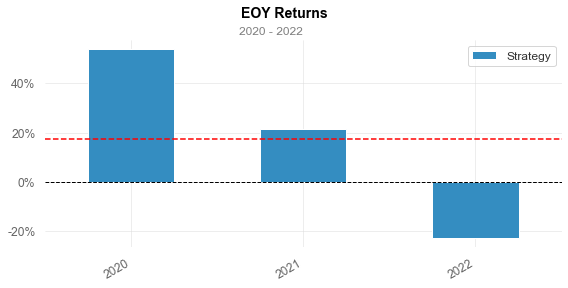

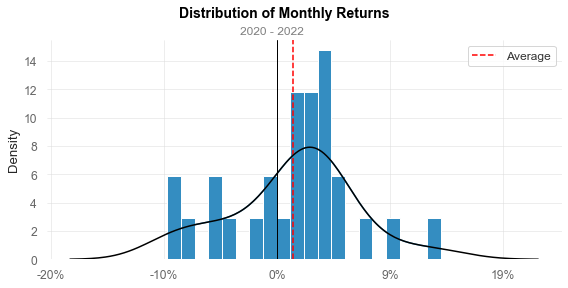

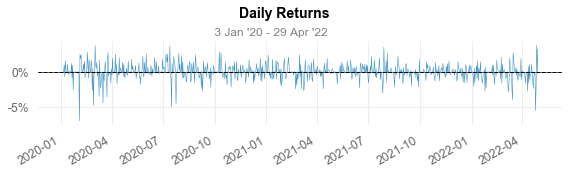

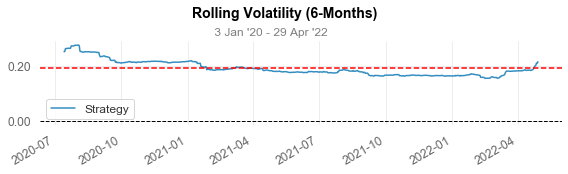

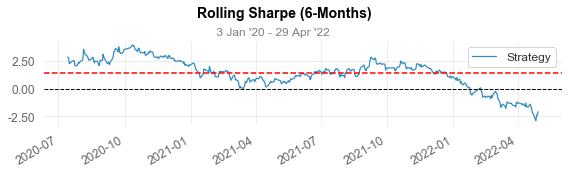

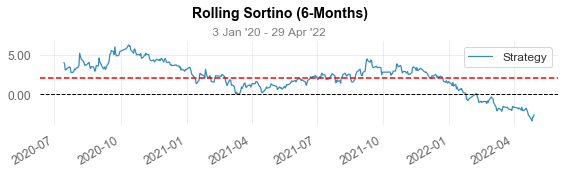

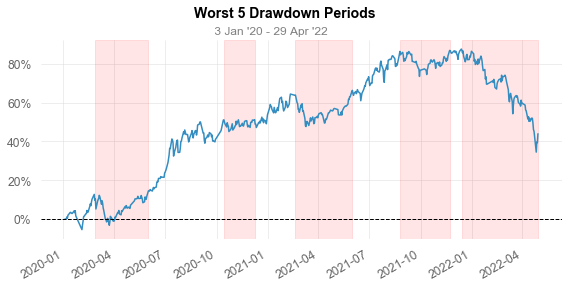

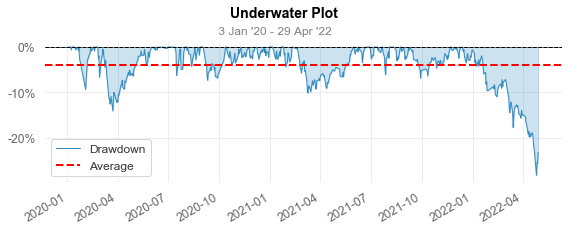

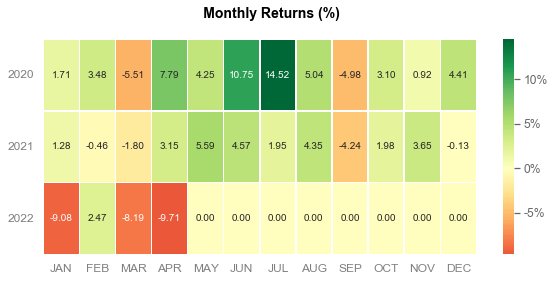

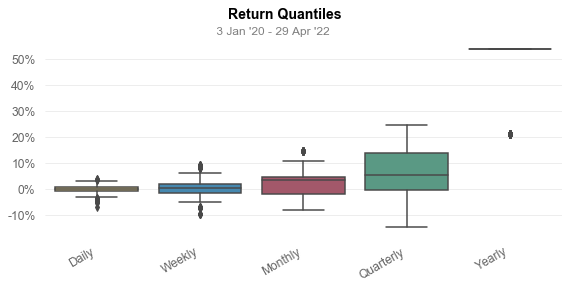

In [105]:
fp3_returns = pd.Series(fp3_ret.ret)
qs.reports.full(fp3_returns)

**结论**

|                            | 低波动组  | 中波动组  | 高波动组  |
| -------------------------- | --------- | --------- | --------- |
| Start Period               | 2020/1/3  | 2020/1/3  | 2020/1/3  |
| End Period                 | 2022/4/29 | 2022/4/29 | 2022/4/29 |
| Risk-Free Rate             | 0.00%     | 0.00%     | 0.00%     |
| Time in Market             | 100.00%   | 100.00%   | 100.00%   |
| -------------------------- | --------- | --------- | --------- |
| Cumulative  Return         | 57.12%    | 41.51%    | 43.97%    |
| CAGR﹪                     | 21.50%    | 16.14%    | 17.01%    |
| -------------------------- | --------- | --------- | --------- |
| Sharpe                     | 1.22      | 0.89      | 0.88      |
| Prob. Sharpe  Ratio        | 96.86%    | 91.27%    | 90.87%    |
| Smart Sharpe               | 1.21      | 0.88      | 0.86      |
| Sortino                    | 1.69      | 1.24      | 1.22      |
| Smart Sortino              | 1.68      | 1.22      | 1.18      |
| Sortino/√2                 | 1.2       | 0.87      | 0.86      |
| Smart  Sortino/√2          | 1.19      | 0.86      | 0.84      |
| Omega                      | 1.24      | 1.16      | 1.16      |
| -------------------------- | --------- | --------- | --------- |
| Max Drawdown               | -19.51%   | -22.19%   | -28.28%   |
| Longest DD  Days           | 12800.00% | 26300.00% | 136       |
| Volatility  (ann.)         | 18.01%    | 19.57%    | 21.17%    |
| Calmar                     | 1.1       | 0.73      | 0.6       |
| Skew                       | -0.78     | -0.68     | -0.66     |
| Kurtosis                   | 4.48      | 2.51      | 2.4       |
| -------------------------- | --------- | --------- | --------- |
| Expected Daily  %          | 0.08%     | 0.06%     | 0.06%     |
| Expected  Monthly %        | 1.63%     | 1.25%     | 1.31%     |
| Expected  Yearly %         | 16.25%    | 12.27%    | 12.92%    |
| Kelly  Criterion           | 11.07%    | 7.44%     | 7.60%     |
| Risk of Ruin               | 0.00%     | 0.00%     | 0.00%     |
| Daily  Value-at-Risk       | -1.78%    | -1.96%    | -2.12%    |
| Expected  Shortfall (cVaR) | -1.78%    | -1.96%    | -2.12%    |
| -------------------------- | --------- | --------- | --------- |
| Max  Consecutive Wins      | 12        | 8         | 8         |
| Max  Consecutive Losses    | 7         | 7         | 6         |
| Gain/Pain  Ratio           | 0.24      | 0.16      | 0.16      |
| Gain/Pain (1M)             | 1.95      | 1.16      | 0.95      |
| -------------------------- | --------- | --------- | --------- |
| Payoff Ratio               | 0.92      | 1.03      | 0.93      |
| Profit Factor              | 1.24      | 1.16      | 1.16      |
| Common Sense  Ratio        | 1.29      | 1.17      | 1.09      |
| CPC Index                  | 0.65      | 0.64      | 0.6       |
| Tail Ratio                 | 1.05      | 1         | 0.94      |
| Outlier Win  Ratio         | 3.7       | 3.19      | 2.93      |
| Outlier Loss  Ratio        | 4.49      | 4.1       | 3.94      |
| -------------------------- | --------- | --------- | --------- |
| MTD                        | -4.49%    | -4.48%    | -9.71%    |
| 3M                         | -9.24%    | -9.98%    | -15.05%   |
| 6M                         | -8.02%    | -9.61%    | -18.95%   |
| YTD                        | -14.01%   | -17.07%   | -22.76%   |
| 1Y                         | 0.79%     | -7.61%    | -8.01%    |
| 3Y (ann.)                  | 21.50%    | 16.14%    | 17.01%    |
| 5Y (ann.)                  | 21.50%    | 16.14%    | 17.01%    |
| 10Y (ann.)                 | 21.50%    | 16.14%    | 17.01%    |
| All-time  (ann.)           | 21.50%    | 16.14%    | 17.01%    |
| -------------------------- | --------- | --------- | --------- |
| Best Day                   | 4.15%     | 3.34%     | 3.84%     |
| Worst Day                  | -6.89%    | -6.64%    | -6.96%    |
| Best Month                 | 15.45%    | 17.72%    | 14.52%    |
| Worst Month                | -6.83%    | -7.87%    | -9.71%    |
| Best Year                  | 46.66%    | 50.65%    | 53.70%    |
| Worst Year                 | -14.01%   | -17.07%   | -22.76%   |
| -------------------------- | --------- | --------- | --------- |
| Avg. Drawdown              | -2.52%    | -3.08%    | -3.51%    |
| Avg. Drawdown  Days        | 16        | 20        | 20        |
| Recovery  Factor           | 2.93      | 1.87      | 1.56      |
| Ulcer Index                | 0.05      | 0.06      | 0.06      |
| Serenity Index             | 1.57      | 0.78      | 0.78      |
| -------------------------- | --------- | --------- | --------- |
| Avg. Up Month              | 3.52%     | 4.06%     | 4.47%     |
| Avg. Down  Month           | -3.67%    | -3.47%    | -4.90%    |
| Win Days %                 | 57.47%    | 53.02%    | 55.52%    |
| Win Month %                | 75.00%    | 64.29%    | 67.86%    |
| Win Quarter %              | 70.00%    | 60.00%    | 60.00%    |
| Win Year %                 | 66.67%    | 66.67%    | 66.67%    |
| -------------------------- | --------- | --------- | --------- |
**通过对股票基金进行波动率分层，优选各层中夏普比高的公募基金构建等权组合，从组合业绩表现来看，低波动组的基金组合表现最优，而高波动组的基金组合表现最差。**
**说明针对股票基金进行波动率分层后进行筛选的策略是有效的**
